<a href="https://colab.research.google.com/github/AjMing/Pattern-EGCI463/blob/main/Week3/Reading_digit_with_SKlearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [7]:
# 2. Data Loading
# For Colab:

import io
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded["digit.csv"]), header=None)

# If running locally, use:
#df = pd.read_csv("digit.csv", header=None)


In [8]:
 #3. Quick Data Inspection
print("Shape:", df.shape)
print("First few rows:\n", df.head())

Shape: (500, 785)
First few rows:
    0    1    2    3    4    5    6    7    8    9    ...  775  776  777  778  \
0    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
2    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
3    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   
4    0    0    0    0    0    0    0    0    0    0  ...    0    0    0    0   

   779  780  781  782  783  784  
0    0    0    0    0    0    0  
1    0    0    0    0    0    0  
2    0    0    0    0    0    0  
3    0    0    0    0    0    0  
4    0    0    0    0    0    0  

[5 rows x 785 columns]


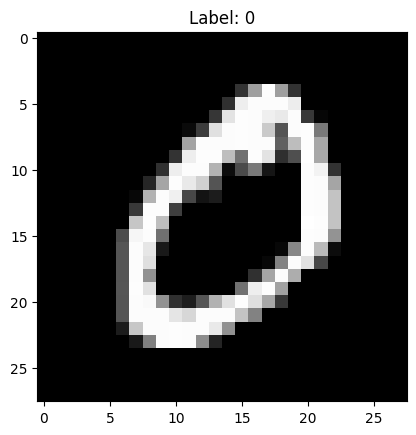

In [9]:
# 4. Visualize a Sample Digit
first_digit = np.array(df.iloc[0, :-1]).reshape(28, 28)
plt.imshow(first_digit, cmap="gray")
plt.title(f"Label: {df.iloc[0, -1]}")
plt.show()


In [11]:
# 5. Reshape for Further Analysis (optional)
# For access as [digit][sample][features] if needed
digit_images = np.array(df.iloc[:, :-1]).reshape(-1, 28, 28)

In [12]:
# 6. Binarize Images (thresholding)
bin_digits = (df.iloc[:, :-1] > 128).astype(int)


In [14]:
# 7. Prepare Data dataframe --> values
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)



In [17]:
# 8. Train Multinomial Naive Bayes Model
model_mn = MultinomialNB().fit(X_train, y_train)


In [26]:
# 9. Show Test prediction and compare with the actual value
y_pred=model_mn.predict(X_test)
print("Prediction and Actual value" )
y_pred=model_mn.predict(X_test)
np.array([y_pred ,y_test]).T

Prediction and Actual value


array([[2, 2],
       [5, 5],
       [8, 8],
       [9, 7],
       [4, 4],
       [8, 8],
       [0, 0],
       [8, 8],
       [6, 6],
       [6, 6],
       [9, 9],
       [6, 6],
       [3, 3],
       [2, 2],
       [7, 7],
       [3, 3],
       [6, 6],
       [9, 9],
       [6, 6],
       [3, 3],
       [0, 9],
       [1, 1],
       [5, 5],
       [7, 7],
       [1, 1],
       [3, 3],
       [0, 0],
       [7, 7],
       [4, 9],
       [0, 0],
       [2, 2],
       [4, 4],
       [7, 7],
       [3, 3],
       [4, 4],
       [5, 3],
       [3, 3],
       [6, 6],
       [4, 4],
       [6, 6],
       [4, 4],
       [0, 0],
       [9, 9],
       [1, 1],
       [5, 1],
       [8, 8],
       [2, 8],
       [9, 4],
       [2, 2],
       [9, 9],
       [8, 8],
       [5, 5],
       [5, 5],
       [4, 4],
       [9, 9],
       [1, 8],
       [0, 0],
       [1, 1],
       [9, 9],
       [6, 6],
       [9, 9],
       [5, 5],
       [3, 3],
       [5, 5],
       [9, 9],
       [1, 5],
       [4,

In [76]:
# 10. Compare the probability
np.set_printoptions(precision=5,suppress=True)
y_prob = model_mn.predict_proba(X_test)
print(y_prob)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1.

In [75]:
# Show the result with probability
np.set_printoptions(threshold=np.inf, linewidth=np.inf)
Result=np.hstack((y_prob, y_pred.reshape(-1, 1)))
print(Result)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 5.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 8.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 9.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 4.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 8.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 8.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 6.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 6.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 9.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 6.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 3.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 2.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 7.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 3.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 6.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 9.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 6.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 3.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 5.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 7.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 3.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.

In [97]:
# 11. Count the mislabeled
print("Number of mislabeled points out of a total %d points " , (y_test != y_pred).sum())

print("The accuracy is %.2f"%((y_test == y_pred).mean()*100) +"%" )


Number of mislabeled points out of a total %d points  15
The accuracy is 85.00%


In [98]:
# 12. Use score to find the accuracy
print("MultinomialNB train accuracy:", model_mn.score(X_train, y_train))
print("MultinomialNB test accuracy:", model_mn.score(X_test, y_test))

MultinomialNB train accuracy: 0.905
MultinomialNB test accuracy: 0.85


In [103]:
# 13. Some parameters

print(model_mn.classes_)
print(model_mn.class_count_)
#print(model_mn.class_prior_) NOT AVAILABLE IN MULTINOMIAL
print(model_mn.feature_count_)
print(model_mn.feature_log_prob_)

[0 1 2 3 4 5 6 7 8 9]
[38. 42. 42. 39. 41. 40. 41. 40. 40. 37.]
[[    0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    56.   247.   121.     0.     0.    88.   127.     5.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    26.   181.   361.   612.  1317.  2050.  2433.  2788.  3106.  3044.  2143.   665.   185.    

Referece: https://scikit-learn.org/stable/modules/naive_bayes.html


In [104]:
# 14. Create a confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=model_mn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_mn.classes_)

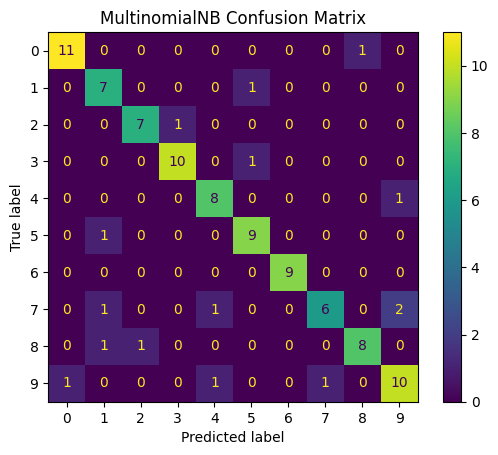

In [106]:
disp.plot()
plt.title("MultinomialNB Confusion Matrix")
plt.show()

Reference:https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html


# Gaussian Navie Bayes

In [107]:
# 1. Train Gaussian Naive Bayes Model
model_gb = GaussianNB().fit(X_train, y_train)



In [108]:
# 2. Show output parameters

np.set_printoptions(precision=5,suppress=True)
y_prob = model_mn.predict_proba(X_test)
print(y_prob)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1.

In [ ]:
#3 Task 1. Compare the prediction output and the real test data

In [ ]:
#3 Task 2. Compare and find mislabelled data

In [ ]:
#4 Task 3. Compute the score of both train/test

In [ ]:
#5 Task 4. Computer Precision of all data (How it can be done? Explain the result)

In [ ]:
#6 Task 5. Computer Recall  of all data How it can be done? Explain the result)